# Psychoinformatics - Week 5 (Examples)
by Tsung-Ren (Tren) Huang (trhuang@ntu.edu.tw)

## 1 HTML & CSS

### 1.1 Getting pages from Google

In [1]:
import requests
URI='https://www.google.com/search?q=the+difference+between+data+engineer+and+data+scientist'
r=requests.get(URI)

200
{'Content-Type': 'text/html; charset=ISO-8859-1', 'Date': 'Thu, 05 Oct 2023 07:02:49 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Content-Security-Policy': "object-src 'none';base-uri 'self';script-src 'nonce-TsRPTq00LBJwn81M1y9YFQ' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/xsrp", 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '1P_JAR=2023-10-05-07; expires=Sat, 04-Nov-2023 07:02:49 GMT; path=/; domain=.google.com; Secure, AEC=Ackid1Qr3ZnzAiLSHveO-z0KZ3WlRSQOaJA608qJ61M-K-cwzbQoYCYxdHE; expires=Tue, 02-Apr-2024 07:02:49 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax, NID=511=dZpLXkoPmeAdw_ITuNQmBFxVy-QOtC5VQ7Eozv3DCwG9XC3OzrcsagQVVcdVRI9YL1HoP1tzpz4xyxzrOIYR6FmWxxkcvrrHKYnNgTn7ByN5ag9uWskqvKGOoH5d9kZtNNvp7Md8YJYXTdAO3zMHBOMxy8km
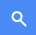

In [2]:
print(r.status_code)
print(r.headers)
print(r.encoding)
print(r.text)

### 1.2 Basic HTML

<h1>標1</h1><hr> <h2>標2</hr> <a href="http://ptt.cc">連接</a>
<br><br><br><br>
<hr><hr>
這樣<br>可以斷行 <img src="http://bit.ly/1p2za46" width=50%>  
<center>這樣可以置中和<font color=red>換色</font></center>
<ul>
<li><b>粗體</b></li>
<li><i>斜體</i></li>    <li><u>底線</u></li>
</ul>
<table border=1>
<tr><td>11</td>    <td>12</td></tr>
<tr><td>21</td>                                   <td>22</td></tr>
</table>

### 1.3 Basic CSS

#### 0.3.1 CSS not working in Jypyter Notebook

<style>
body {color:white; background-color:black;}
h1 {color:red; font-size:20pt}
.yy {color:yellow}
span#gg {color:green}
div#bb {color:blue}
</style>
<h1>Hi!</h1>
This is <span class=yy>test1</span><hr>
This is <div class=yy>test2</div><hr>
This is <span id=gg>test3</span><hr>
This is <div id=gg>test4</div><hr>
This is <div id=bb>test5</div><hr>

#### 1.3.2 CSS working in regular webpages

In [6]:
from IPython.display import IFrame
IFrame("http://mil.psy.ntu.edu.tw/css.html",width=560, height=315)

## 2 Basic Scraping

### 2.1 Beautiful Soup & Scrapy
You can find more about Beautiful Soup 4 
<a href="https://www.crummy.com/software/BeautifulSoup/bs4/doc/">here</a>.

In [ ]:
!pip install scrapy
!pip install bs4

#### 2.1.1 Example 1:  
<p><b>1</b>2<b>3</b></p>

In [157]:
data='<p><b>1</b>2<b>3</b></p>'

In [165]:
from bs4 import BeautifulSoup as BS
import re

s=BS(data,'lxml')
print(s)
print(s.find(text=('2')),'\n')

print(s.find('p'))
print(s.p,'\n')

print(s.b)
print(s.b.string,'\n')

print(s.find_all('b'))

<html><body><p><b>1</b>2<b>3</b></p></body></html>
2 

<p><b>1</b>2<b>3</b></p>
<p><b>1</b>2<b>3</b></p> 

<b>1</b>
1 

[<b>1</b>, <b>3</b>]


#### 2.1.2 Example 2:  
<table>
<tr><td>11</td><td>12</td></tr>
<tr><td>21</td><td><a href="http://ptt.cc">22</a></td></tr>
<tr><td>31</td><td>32</td></tr>
</table>

In [26]:
data='''<table>
<tr><td>11</td><td>12</td></tr>
<tr><td>21</td><td><a href="http://ptt.cc">22</a></td></tr>
<tr><td>31</td><td>32</td></tr>
</table>'''

In [27]:
s=BS(data)
print(s.a,'\n',s.a.string)
print(s.a.parent.previous_sibling)
for child in s.tr.children:
    print(child)

<a href="http://ptt.cc">22</a> 
 22
<td>21</td>
<td>11</td>
<td>12</td>


#### 2.1.3 Collecting links from Google

##### 2.1.3.1 Using Beautiful Soup

In [18]:
from bs4 import BeautifulSoup as BS
import requests
URI='https://www.google.com/search?q=the+difference+between+data+engineer+and+data+scientist'
r=requests.get(URI)

2023-10-05 15:51:09 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.google.com:443
2023-10-05 15:51:09 [urllib3.connectionpool] DEBUG: https://www.google.com:443 "GET /search?q=the+difference+between+data+engineer+and+data+scientist HTTP/1.1" 200 None


In [28]:
s=BS(r.text)
for link in s.find_all('a'):
    print(link.string,link.get('href'),'\n')

None /?sa=X&ved=0ahUKEwiZzfCYtt6BAxXJrlYBHV7XChcQOwgC 

這裡 /search?q=the+difference+between+data+engineer+and+data+scientist&sca_esv=570917586&ie=UTF-8&gbv=1&sei=7WoeZdmiNcnd2roP3q6ruAE 

圖片 /search?q=the+difference+between+data+engineer+and+data+scientist&sca_esv=570917586&ie=UTF-8&tbm=isch&source=lnms&sa=X&ved=0ahUKEwiZzfCYtt6BAxXJrlYBHV7XChcQ_AUIBigB 

影片 /search?q=the+difference+between+data+engineer+and+data+scientist&sca_esv=570917586&ie=UTF-8&tbm=vid&source=lnms&sa=X&ved=0ahUKEwiZzfCYtt6BAxXJrlYBHV7XChcQ_AUIBygC 

書籍 /search?q=the+difference+between+data+engineer+and+data+scientist&sca_esv=570917586&ie=UTF-8&tbm=bks&source=lnms&sa=X&ved=0ahUKEwiZzfCYtt6BAxXJrlYBHV7XChcQ_AUICCgD 

地圖 https://maps.google.com/maps?q=the+difference+between+data+engineer+and+data+scientist&um=1&ie=UTF-8&sa=X&ved=0ahUKEwiZzfCYtt6BAxXJrlYBHV7XChcQ_AUICSgE 

新聞 /search?q=the+difference+between+data+engineer+and+data+scientist&sca_esv=570917586&ie=UTF-8&tbm=nws&source=lnms&sa=X&ved=0ahUKEwiZzfCYtt6BAxXJr

<!DOCTYPE html>
<html lang="zh-TW"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>the difference between data engineer and data scientist - Google 搜尋</title><script nonce="BkpmyogiDixBrB6yZ6y9FQ">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.flo
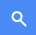

In [20]:
print(s)

In [61]:
items=s.find_all("div",{"class": "BNeawe vvjwJb AP7Wnd"})
for item in items:
    print(item.string)
    
print('\n'*3)

#items=s.find_all("div",{"class": "BNeawe s3v9rd AP7Wnd"})
items = s.find_all('span', {"class":"r0bn4c rQMQod"})

texts = [item.next.next.text for item in items]

print('\n\n'.join(texts[::2]))

Data Scientist vs Data Engineer | DataCamp
Data Engineer vs. Data Scientist: What's the Difference? - Forage
Data Engineer vs. Data Scientist: The Best Choice for 2023
The Difference Between Data Science and Data Engineering
資料科學家、資料分析師、資料工程師，實務上如何在資料團隊分工
Data Engineer VS Data Scientist - Towards Data Science
Data Science vs Data Engineering
Data Scientist vs. Data Engineer: What's The Difference? | Built In
Difference between Data Scientist and Data Engineer
Data Engineer vs Data Scientist: What are the differences?




其他人想知道Which is better data scientist or data engineer?Can a data engineer be a data scientist?Is data engineer salary higher than data scientist?What is the difference between data engineer and data scientist and machine learning?

While a career in data engineering involves primarily technical skills, like coding and understanding data warehouse architectures, data science ...

Today, the main difference between these two data professionals is that data engineers buil

In [ ]:
import re
s.find_all(s)

##### 2.1.3.2 Using Scrapy

In [9]:
import scrapy
from scrapy.crawler import CrawlerProcess
from bs4 import BeautifulSoup as BS

In [10]:
class MySpider(scrapy.Spider):
    name="google"
    start_urls=["https://www.google.com/search?q=the+difference+between+data+engineer+and+data+scientist"]
    def parse(self, response):
        s=BS(response.text,'lxml')
        for link in s.find_all('a'):
            print(link.text,link.get('href'),'\n')

In [11]:
process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})
process.crawl(MySpider)
process.start()

2023-10-05 15:39:48 [scrapy.utils.log] INFO: Scrapy 2.11.0 started (bot: scrapybot)
2023-10-05 15:39:48 [scrapy.utils.log] INFO: Versions: lxml 4.9.1.0, libxml2 2.9.14, cssselect 1.2.0, parsel 1.8.1, w3lib 2.1.2, Twisted 22.10.0, Python 3.10.8 (main, Nov 24 2022, 08:08:27) [Clang 14.0.6 ], pyOpenSSL 22.0.0 (OpenSSL 1.1.1s  1 Nov 2022), cryptography 38.0.1, Platform macOS-13.1-arm64-arm-64bit
2023-10-05 15:39:48 [scrapy.addons] INFO: Enabled addons:
[]
2023-10-05 15:39:48 [py.warnings] WARNING: /Users/tren/miniconda3/lib/python3.10/site-packages/scrapy/utils/request.py:254: ScrapyDeprecationWarning: '2.6' is a deprecated value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting.

It is also the default value. In other words, it is normal to get this warning if you have not defined a value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting. This is so for backward compatibility reasons, but it will change in a future version of Scrapy.

See the documentation of the 'REQUEST_FINGER

 /?sca_esv=570917586&output=search&sa=X&ved=0ahUKEwj2vPvTs96BAxWIs1YBHSH5Bd8QPAgC 

圖片 /search?q=the+difference+between+data+engineer+and+data+scientist&sca_esv=570917586&tbm=isch&source=lnms&sa=X&ved=0ahUKEwj2vPvTs96BAxWIs1YBHSH5Bd8Q_AUIBSgB 

影片 /search?q=the+difference+between+data+engineer+and+data+scientist&sca_esv=570917586&tbm=vid&source=lnms&sa=X&ved=0ahUKEwj2vPvTs96BAxWIs1YBHSH5Bd8Q_AUIBigC 

書籍 /search?q=the+difference+between+data+engineer+and+data+scientist&sca_esv=570917586&tbm=bks&source=lnms&sa=X&ved=0ahUKEwj2vPvTs96BAxWIs1YBHSH5Bd8Q_AUIBygD 

僅搜尋英文的結果。 /search?q=the+difference+between+data+engineer+and+data+scientist&sca_esv=570917586&lr=lang_zh-TW&sa=X&ved=2ahUKEwj2vPvTs96BAxWIs1YBHSH5Bd8QuAF6BAgCEAE 

使用偏好 /url?q=/preferences%3Fhl%3Dzh-TW&sa=U&ved=2ahUKEwj2vPvTs96BAxWIs1YBHSH5Bd8QtwF6BAgCEAI&usg=AOvVaw2LyfVukVDcYTl3ZYhuADLc 

 https://images.datacamp.com/image/upload/v1646324576/content_screenshot_2017_02_23_14_26_33_1_ecf4f066e8.png?sa=X&ved=2ahUKEwj2vPvTs96BAxWIs1YB

### 3 Advanced Web Scrapping

#### 3.1.1 Sending HTML forms

##### 3.1.1.1 Using requests

In [62]:
# Not working without sending required info:
import requests
URI="https://www.ptt.cc/bbs/Gossiping"
r=requests.get(URI)
print(r.text)

2023-10-05 16:24:23 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.ptt.cc:443
2023-10-05 16:24:23 [urllib3.connectionpool] DEBUG: https://www.ptt.cc:443 "GET /bbs/Gossiping HTTP/1.1" 302 None
2023-10-05 16:24:24 [urllib3.connectionpool] DEBUG: https://www.ptt.cc:443 "GET /bbs/Gossiping/index.html HTTP/1.1" 302 None
2023-10-05 16:24:24 [urllib3.connectionpool] DEBUG: https://www.ptt.cc:443 "GET /ask/over18?from=%2Fbbs%2FGossiping%2Findex.html HTTP/1.1" 200 None


<!DOCTYPE html>
<html>
	<head>
		<meta charset="utf-8">
		

<meta name="viewport" content="width=device-width, initial-scale=1">

<title>批踢踢實業坊</title>

<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-common.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-base.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-custom.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/pushstream.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-print.css" media="print">




	</head>
    <body>
		
<div class="bbs-screen bbs-content">
    <div class="over18-notice">
        <p>本網站已依網站內容分級規定處理</p>

        <p>警告︰您即將進入之看板內容需滿十八歲方可瀏覽。</p>

        <p>若您尚未年滿十八歲，請點選離開。若您已滿十八歲，亦不可將本區之內容派發、傳閱、出售、出租、交給或借予年齡未滿18歲的人士瀏覽，或將本網站內容向該人士出示、播放或放映。</p>
    </div>
</div>

<div class="bbs-screen bbs-content center clear">
    <form action="/ask/over18"

In [63]:
# Working with required information:
import requests
URI="https://www.ptt.cc/ask/over18"
r=requests.post(URI,data={'yes':'yes','from':'/bbs/Gossiping/'})
print(r.text)

2023-10-05 16:24:30 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.ptt.cc:443
2023-10-05 16:24:30 [urllib3.connectionpool] DEBUG: https://www.ptt.cc:443 "POST /ask/over18 HTTP/1.1" 302 None
2023-10-05 16:24:31 [urllib3.connectionpool] DEBUG: https://www.ptt.cc:443 "GET /bbs/Gossiping/ HTTP/1.1" 302 None
2023-10-05 16:24:31 [urllib3.connectionpool] DEBUG: https://www.ptt.cc:443 "GET /bbs/Gossiping/index.html HTTP/1.1" 200 None


<!DOCTYPE html>
<html>
	<head>
		<meta charset="utf-8">
		

<meta name="viewport" content="width=device-width, initial-scale=1">

<title>看板 Gossiping 文章列表 - 批踢踢實業坊</title>

<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-common.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-base.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-custom.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/pushstream.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-print.css" media="print">




	</head>
    <body>
		
<div id="topbar-container">
	<div id="topbar" class="bbs-content">
		<a id="logo" href="/bbs/">批踢踢實業坊</a>
		<span>&rsaquo;</span>
		<a class="board" href="/bbs/Gossiping/index.html"><span class="board-label">看板 </span>Gossiping</a>
		<a class="right small" href="/about.html">關於我們</a>
		<a class="right small" href="/co

In [64]:
# Working if we send a required cookie:
import requests
URI="https://www.ptt.cc/bbs/Gossiping"
r=requests.get(URI,cookies={"over18":"1"})
print(r.text)

2023-10-05 16:24:50 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.ptt.cc:443
2023-10-05 16:24:51 [urllib3.connectionpool] DEBUG: https://www.ptt.cc:443 "GET /bbs/Gossiping HTTP/1.1" 302 None
2023-10-05 16:24:52 [urllib3.connectionpool] DEBUG: https://www.ptt.cc:443 "GET /bbs/Gossiping/index.html HTTP/1.1" 200 None


<!DOCTYPE html>
<html>
	<head>
		<meta charset="utf-8">
		

<meta name="viewport" content="width=device-width, initial-scale=1">

<title>看板 Gossiping 文章列表 - 批踢踢實業坊</title>

<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-common.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-base.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-custom.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/pushstream.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-print.css" media="print">




	</head>
    <body>
		
<div id="topbar-container">
	<div id="topbar" class="bbs-content">
		<a id="logo" href="/bbs/">批踢踢實業坊</a>
		<span>&rsaquo;</span>
		<a class="board" href="/bbs/Gossiping/index.html"><span class="board-label">看板 </span>Gossiping</a>
		<a class="right small" href="/about.html">關於我們</a>
		<a class="right small" href="/co

##### 3.1.1.2 Using Scrapy

In [1]:
import scrapy
from scrapy.http import Request, FormRequest
from scrapy.crawler import CrawlerProcess

class Spider(scrapy.Spider):
    name="ptt"
    
    def start_requests(self):
        yield Request(url='https://www.ptt.cc/ask/over18',callback=self.login)
        
    def login(self, response):
        yield FormRequest.from_response(
            response,
            formdata={'yes':'yes','from':'/bbs/Gossiping/'},
            callback=self.parse
        )
        
    def parse(self,response):
        print(response.text)
        
        
process = CrawlerProcess()
process.crawl(Spider)
process.start()

2022-09-25 19:46:58 [scrapy.utils.log] INFO: Scrapy 2.5.1 started (bot: scrapybot)
2022-09-25 19:46:58 [scrapy.utils.log] INFO: Versions: lxml 4.6.3.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 21.7.0, Python 3.8.8 (default, Apr 13 2021, 12:59:45) - [Clang 10.0.0 ], pyOpenSSL 20.0.1 (OpenSSL 1.1.1k  25 Mar 2021), cryptography 3.4.7, Platform macOS-10.16-x86_64-i386-64bit
2022-09-25 19:46:58 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2022-09-25 19:46:58 [scrapy.crawler] INFO: Overridden settings:
{}
2022-09-25 19:46:58 [scrapy.extensions.telnet] INFO: Telnet Password: 96c40a838aa41210
2022-09-25 19:46:58 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']
2022-09-25 19:46:59 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewa

<!DOCTYPE html>
<html>
	<head>
		<meta charset="utf-8">
		

<meta name="viewport" content="width=device-width, initial-scale=1">

<title>看板 Gossiping 文章列表 - 批踢踢實業坊</title>

<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-common.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-base.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-custom.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/pushstream.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-print.css" media="print">




	</head>
    <body>
		
<div id="topbar-container">
	<div id="topbar" class="bbs-content">
		<a id="logo" href="/bbs/">批踢踢實業坊</a>
		<span>&rsaquo;</span>
		<a class="board" href="/bbs/Gossiping/index.html"><span class="board-label">看板 </span>Gossiping</a>
		<a class="right small" href="/about.html">關於我們</a>
		<a class="right small" href="/co

In [1]:
import scrapy
from scrapy.http import Request, FormRequest
from scrapy.crawler import CrawlerProcess

class Spider(scrapy.Spider):
    name="ptt"
    
    def start_requests(self):
        yield Request(url='https://www.ptt.cc/ask/over18',cookies={'Cookie':'over18=1','User-Agent':'Mozilla/5.0'},callback=self.login)
        
    def login(self, response):
        yield FormRequest.from_response(
            response,
            formdata={'yes':'yes','from':'/bbs/Gossiping/'},
            callback=self.parse
        )
        
    def parse(self,response):
        print(response.text)
        
        
process = CrawlerProcess()
process.crawl(Spider)
process.start()

2018-10-10 21:07:10 [scrapy.utils.log] INFO: Scrapy 1.5.1 started (bot: scrapybot)
2018-10-10 21:07:10 [scrapy.utils.log] INFO: Versions: lxml 4.2.1.0, libxml2 2.9.8, cssselect 1.0.3, parsel 1.5.0, w3lib 1.19.0, Twisted 18.7.0, Python 3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) - [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)], pyOpenSSL 18.0.0 (OpenSSL 1.0.2o  27 Mar 2018), cryptography 2.2.2, Platform Darwin-17.7.0-x86_64-i386-64bit
2018-10-10 21:07:10 [scrapy.crawler] INFO: Overridden settings: {}
2018-10-10 21:07:10 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']
2018-10-10 21:07:10 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scrapy.downloadermiddlewares.downloadtimeout.DownloadTimeoutMiddleware',
 'scrapy.downloadermid

<!DOCTYPE html>
<html>
	<head>
		<meta charset="utf-8">
		

<meta name="viewport" content="width=device-width, initial-scale=1">

<title>看板 Gossiping 文章列表 - 批踢踢實業坊</title>

<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-common.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-base.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-custom.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/pushstream.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-print.css" media="print">




	</head>
    <body>
		
<div id="topbar-container">
	<div id="topbar" class="bbs-content">
		<a id="logo" href="/bbs/">批踢踢實業坊</a>
		<span>&rsaquo;</span>
		<a class="board" href="/bbs/Gossiping/index.html"><span class="board-label">看板 </span>Gossiping</a>
		<a class="right small" href="/about.html">關於我們</a>
		<a class="right small" href="/co

### 3.2 Selenium
<font color="red"><h3>You need to download webdrivers first!</h3></font>

Edge: https://developer.microsoft.com/zh-tw/microsoft-edge/tools/webdriver/

Chrome: https://chromedriver.chromium.org/downloads

In [ ]:
!pip install selenium

In [65]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.common.by import By

URI='https://www.ptt.cc/bbs/Gossiping/'
driver=webdriver.Edge(service=Service("./msedgedriver"))
driver.get(URI)
btn=driver.find_element(By.NAME,'yes')
driver.save_screenshot('before_click.png')
btn.click()
driver.save_screenshot('after_click.png')
print(driver.page_source)

2023-10-05 16:36:06 [selenium.webdriver.common.service] DEBUG: Started executable: `./msedgedriver` in a child process with pid: 63620
2023-10-05 16:36:07 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://localhost:52022/session {"capabilities": {"firstMatch": [{}], "alwaysMatch": {"browserName": "MicrosoftEdge", "pageLoadStrategy": "normal", "ms:edgeOptions": {"extensions": [], "args": []}}}}
2023-10-05 16:36:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): localhost:52022
2023-10-05 16:36:17 [urllib3.connectionpool] DEBUG: http://localhost:52022 "POST /session HTTP/1.1" 200 860
2023-10-05 16:36:17 [selenium.webdriver.remote.remote_connection] DEBUG: Remote response: status=200 | data={"value":{"capabilities":{"acceptInsecureCerts":false,"browserName":"msedge","browserVersion":"117.0.2045.55","fedcm:accounts":true,"ms:edgeOptions":{"debuggerAddress":"localhost:52068"},"msedge":{"msedgedriverVersion":"117.0.2045.55 (50f62b8a7655ef91dc6b88bdc536c1bc0a6

2023-10-05 16:36:18 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2023-10-05 16:36:18 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://localhost:52022/session/95bc6794dabc8d41c15f94d97cfe13b9/element/BAB7FBFC8707CDC7286B54ABEE7D28E0_element_3/click {}
2023-10-05 16:36:19 [urllib3.connectionpool] DEBUG: http://localhost:52022 "POST /session/95bc6794dabc8d41c15f94d97cfe13b9/element/BAB7FBFC8707CDC7286B54ABEE7D28E0_element_3/click HTTP/1.1" 200 14
2023-10-05 16:36:19 [selenium.webdriver.remote.remote_connection] DEBUG: Remote response: status=200 | data={"value":null} | headers=HTTPHeaderDict({'Content-Length': '14', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
2023-10-05 16:36:19 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2023-10-05 16:36:19 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://localhost:52022/session/95bc6794dabc8d41c15f94d97cfe13b9/screenshot {}
2023-10-05 1

2023-10-05 16:36:19 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2023-10-05 16:36:19 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://localhost:52022/session/95bc6794dabc8d41c15f94d97cfe13b9/source {}
2023-10-05 16:36:19 [urllib3.connectionpool] DEBUG: http://localhost:52022 "GET /session/95bc6794dabc8d41c15f94d97cfe13b9/source HTTP/1.1" 200 17060
2023-10-05 16:36:19 [selenium.webdriver.remote.remote_connection] DEBUG: Remote response: status=200 | data={"value":"\u003Chtml>\u003Chead>\n\t\t\u003Cmeta charset=\"utf-8\">\n\t\t\n\n\u003Cmeta name=\"viewport\" content=\"width=device-width, initial-scale=1\">\n\n\u003Ctitle>看板 Gossiping 文章列表 - 批踢踢實業坊\u003C/title>\n\n\u003Clink rel=\"stylesheet\" type=\"text/css\" href=\"//images.ptt.cc/bbs/v2.27/bbs-common.css\">\n\u003Clink rel=\"stylesheet\" type=\"text/css\" href=\"//images.ptt.cc/bbs/v2.27/bbs-base.css\" media=\"screen\">\n\u003Clink rel=\"stylesheet\" type=\"text/css\" href=\"//images.ptt.cc/bbs

2023-10-05 16:36:19 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request


<html><head>
		<meta charset="utf-8">
		

<meta name="viewport" content="width=device-width, initial-scale=1">

<title>看板 Gossiping 文章列表 - 批踢踢實業坊</title>

<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-common.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-base.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-custom.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/pushstream.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-print.css" media="print">




	<meta http-equiv="origin-trial" content="AymqwRC7u88Y4JPvfIF2F37QKylC04248hLCdJAsh8xgOfe/dVJPV3XS3wLFca1ZMVOtnBfVjaCMTVudWM//5g4AAAB7eyJvcmlnaW4iOiJodHRwczovL3d3dy5nb29nbGV0YWdtYW5hZ2VyLmNvbTo0NDMiLCJmZWF0dXJlIjoiUHJpdmFjeVNhbmRib3hBZHNBUElzIiwiZXhwaXJ5IjoxNjk1MTY3OTk5LCJpc1RoaXJkUGFydHkiOnRydWV9"></head>
    <body>
		
<div id="topbar-container">
	<div id="

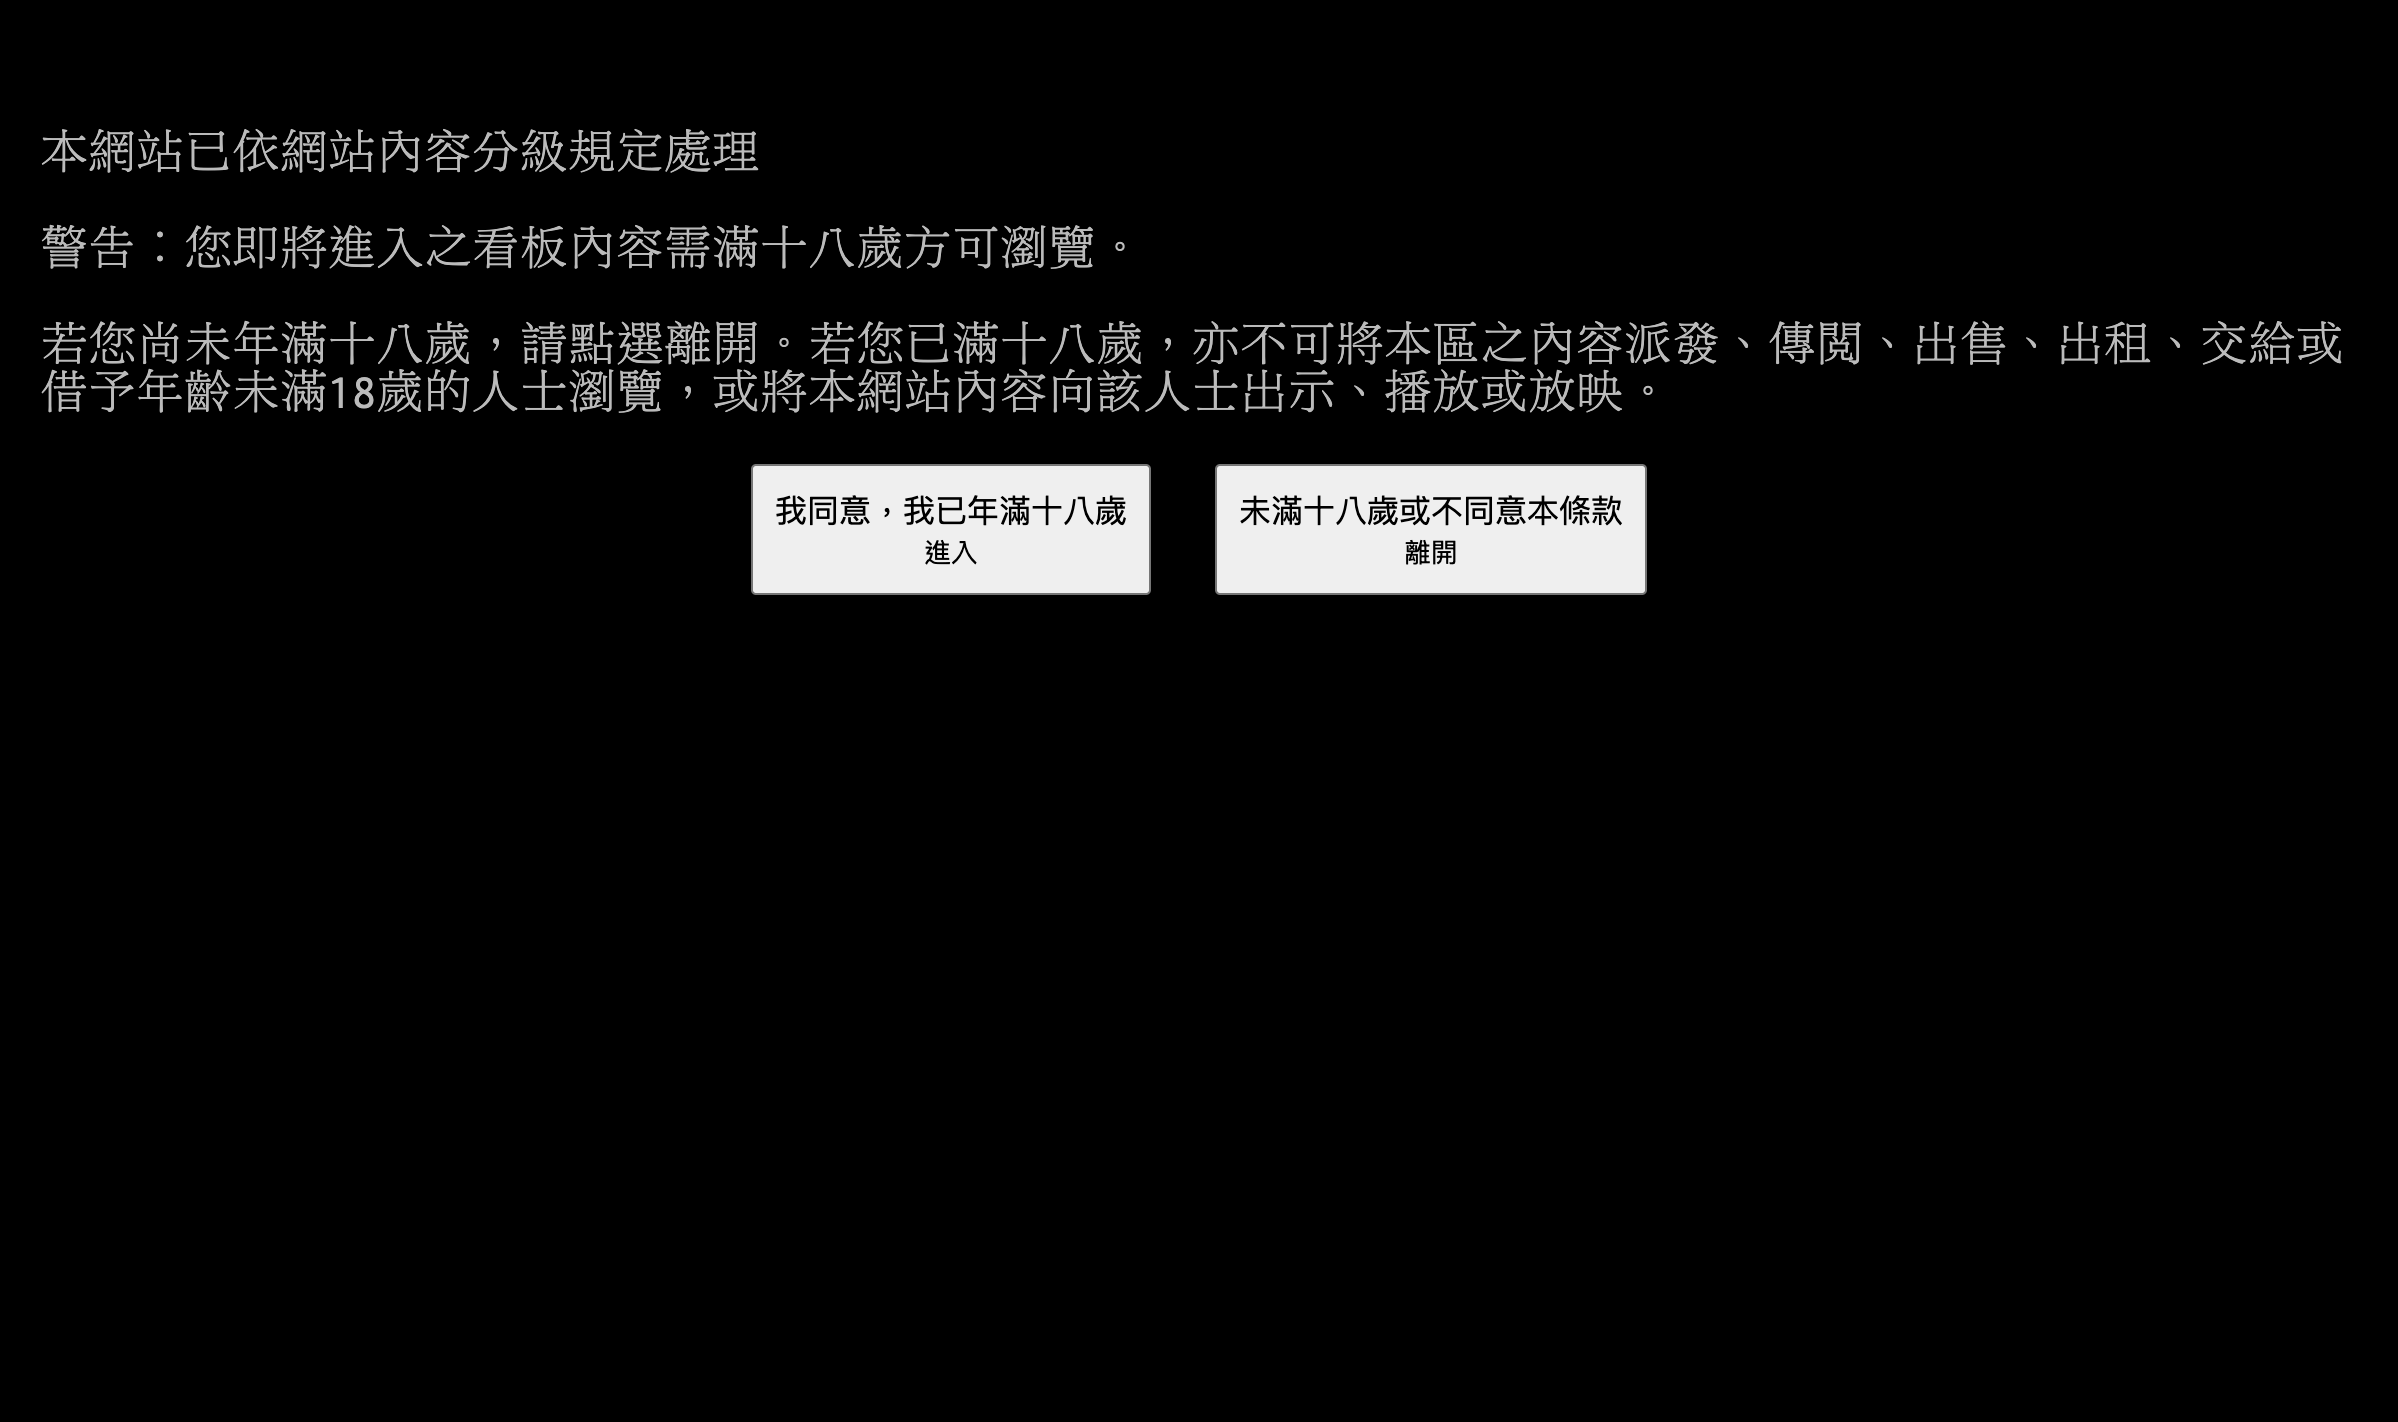

In [31]:
from IPython import display
display.Image("./before_click.png")

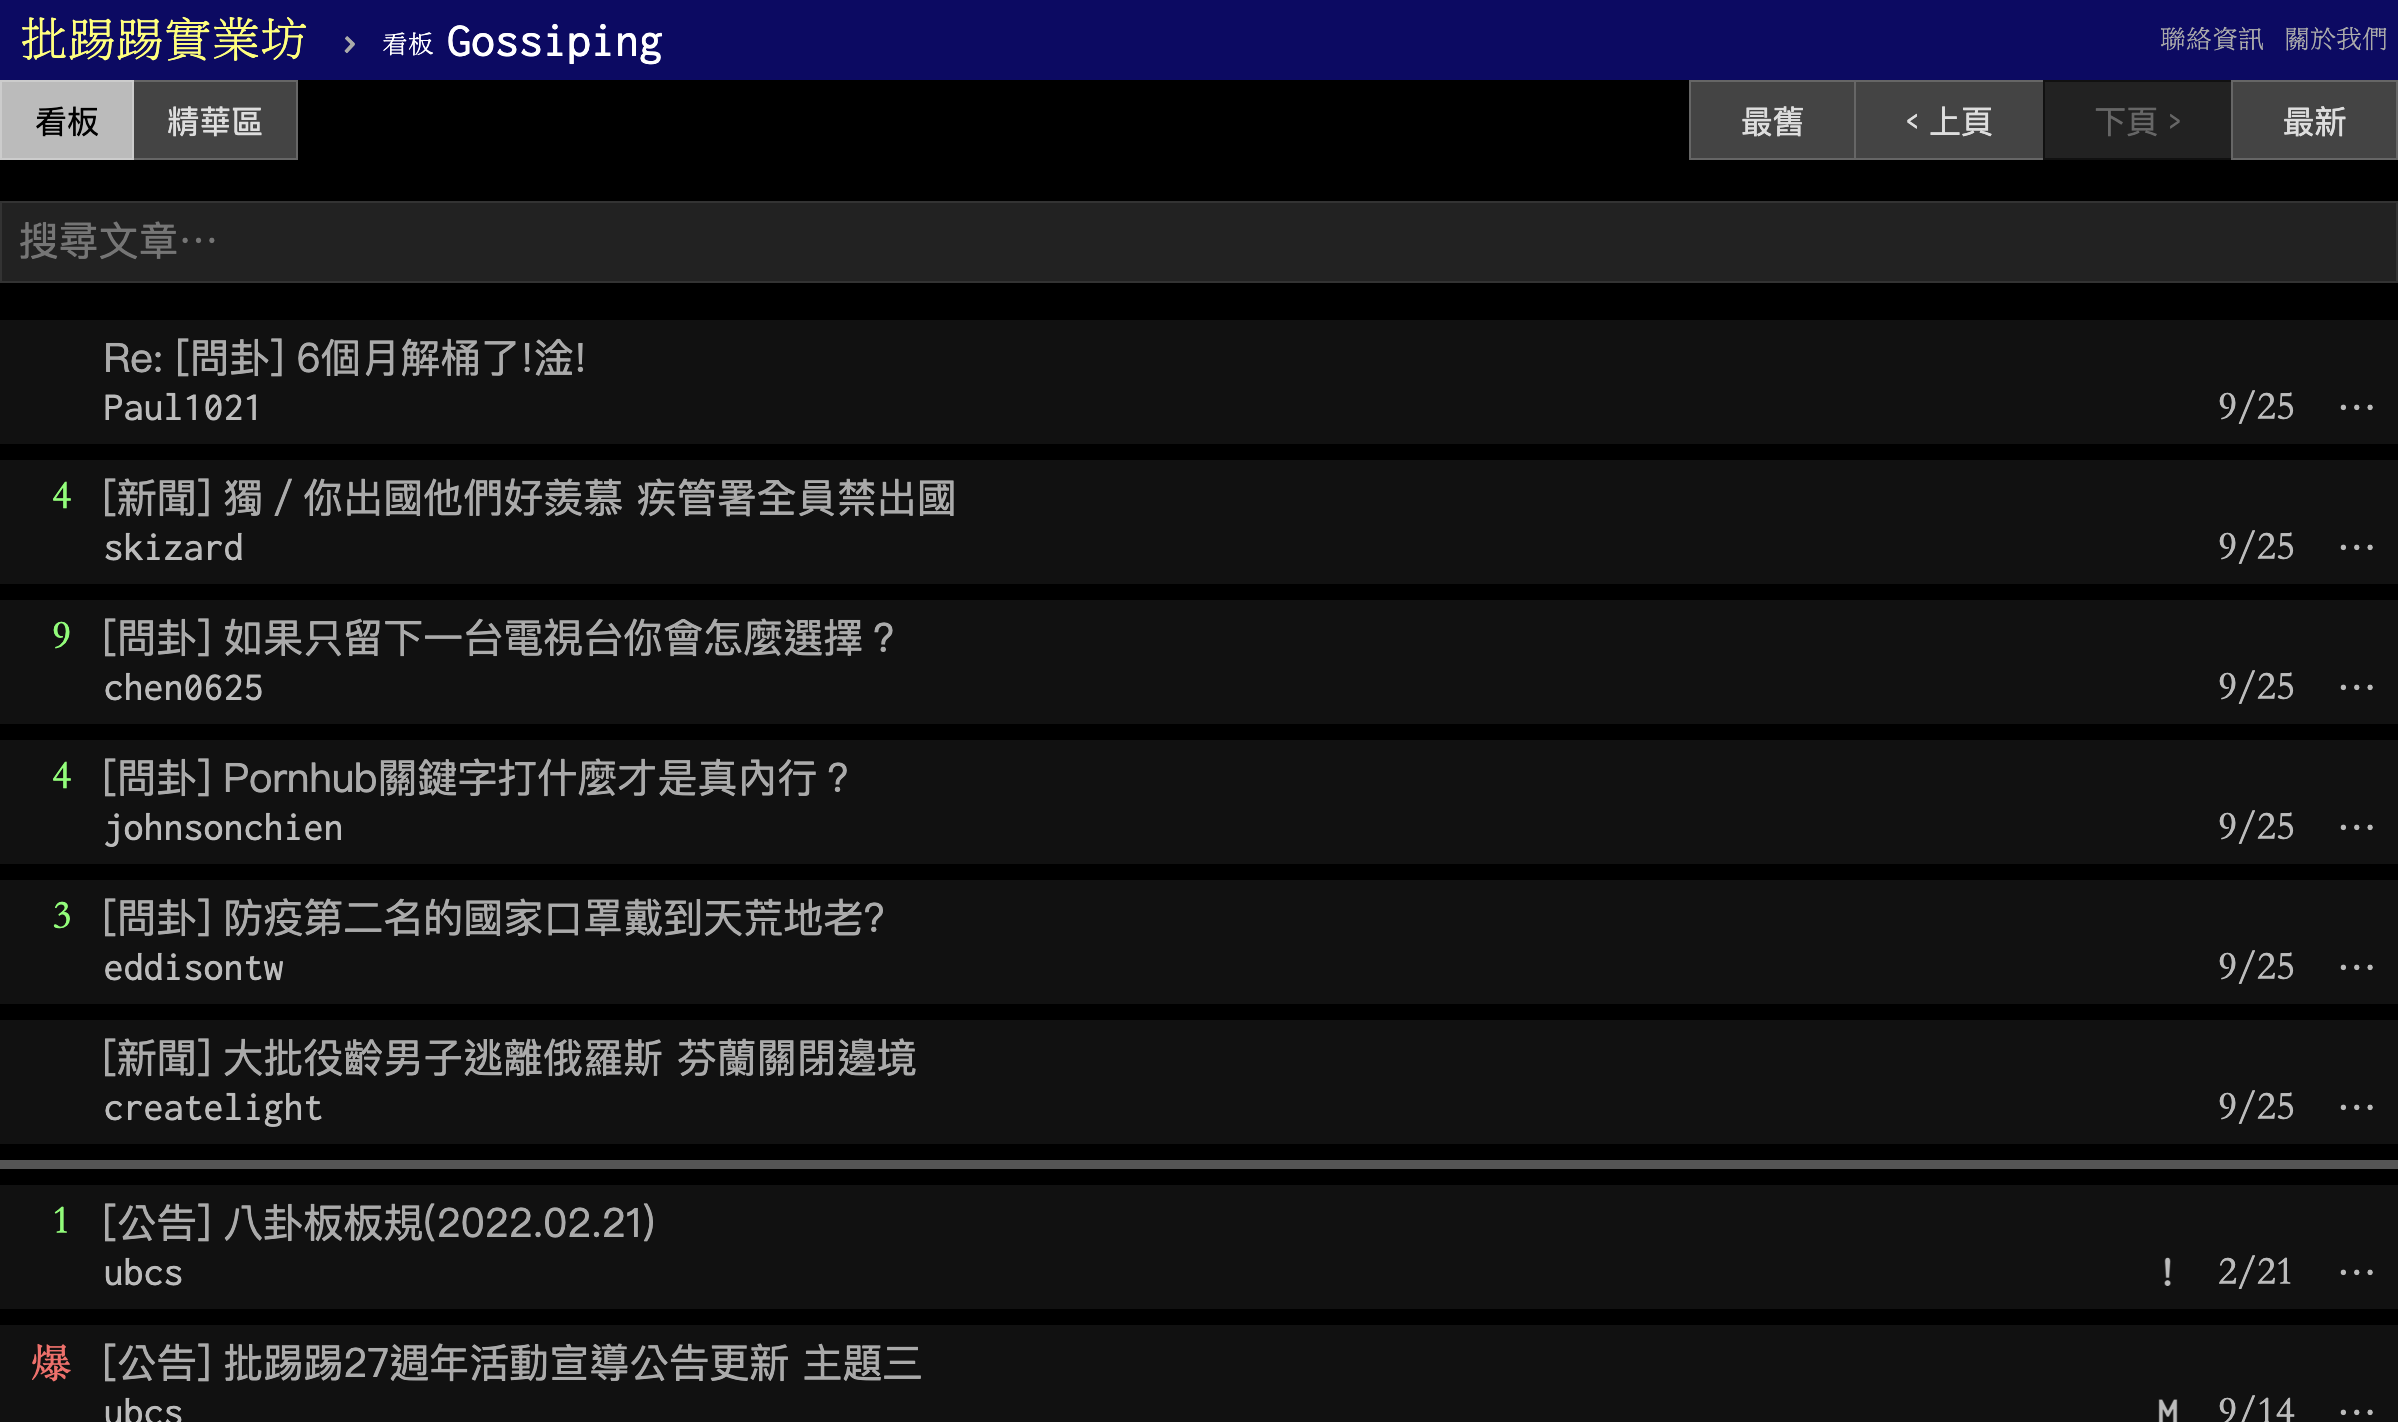

In [32]:
display.Image("./after_click.png")

### 3.3 Solving CAPTCHA by OCR

2023-10-05 16:50:10 [selenium.webdriver.common.service] DEBUG: Started executable: `./msedgedriver` in a child process with pid: 64973
2023-10-05 16:50:10 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://localhost:55779/session {"capabilities": {"firstMatch": [{}], "alwaysMatch": {"browserName": "MicrosoftEdge", "pageLoadStrategy": "normal", "ms:edgeOptions": {"extensions": [], "args": []}}}}
2023-10-05 16:50:10 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): localhost:55779
2023-10-05 16:50:12 [urllib3.connectionpool] DEBUG: http://localhost:55779 "POST /session HTTP/1.1" 200 860
2023-10-05 16:50:12 [selenium.webdriver.remote.remote_connection] DEBUG: Remote response: status=200 | data={"value":{"capabilities":{"acceptInsecureCerts":false,"browserName":"msedge","browserVersion":"117.0.2045.55","fedcm:accounts":true,"ms:edgeOptions":{"debuggerAddress":"localhost:55788"},"msedge":{"msedgedriverVersion":"117.0.2045.55 (50f62b8a7655ef91dc6b88bdc536c1bc0a6

2023-10-05 16:50:13 [urllib3.connectionpool] DEBUG: http://localhost:55779 "POST /session/9c013d7113de52c4322123ce2f132ef1/execute/sync HTTP/1.1" 200 65
2023-10-05 16:50:13 [selenium.webdriver.remote.remote_connection] DEBUG: Remote response: status=200 | data={"value":"https://irs.thsrc.com.tw/IMINT/captImg/vpGUoTwmbb.jpg"} | headers=HTTPHeaderDict({'Content-Length': '65', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
2023-10-05 16:50:13 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2023-10-05 16:50:13 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): irs.thsrc.com.tw:443
2023-10-05 16:50:13 [urllib3.connectionpool] DEBUG: https://irs.thsrc.com.tw:443 "GET /IMINT/captImg/vpGUoTwmbb.jpg HTTP/1.1" 200 3812


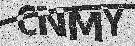

In [136]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.common.by import By

URI='https://irs.thsrc.com.tw/IMINT/'
driver=webdriver.Edge(service=Service("./msedgedriver"))
driver.get(URI)
btn=driver.find_element(By.ID,"cookieAccpetBtn")
btn.click()
img = driver.find_element(By.XPATH,'//img[@id="BookingS1Form_homeCaptcha_passCode"]')
src=img.get_attribute('src')

r=requests.get(src,headers={'User-Agent':'Mozilla/5.0'})
with open('captcha.jpg', 'wb') as f:
    f.write(r.content)
    
from PIL import Image
img=Image.open('captcha.jpg')
img

In [98]:
#!pip install easyocr
import easyocr
reader = easyocr.Reader(['en'],gpu=False)

2023-10-05 16:46:25 [easyocr.easyocr] WARNING: Using CPU. Note: This module is much faster with a GPU.


In [137]:
reader.readtext('captcha.jpg')

[([[8, 0], [135, 0], [135, 46], [8, 46]], 'CNMMY', 0.22500908152288218)]

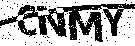

In [138]:
img2=img.point(lambda p: 255 if p > 90 else 0)
img2.save('captcha2.jpg')
img2

In [139]:
reader.readtext('./captcha2.jpg')

[([[8, 0], [135, 0], [135, 46], [8, 46]], 'CNMY', 0.4971674978733063)]